   # Doaa Mahmoud - Data scientest 
   www.linkedin.com/in/doaa-mahmoud-abdel-aty-01b25b144


### From model training to deployment - an introduction to the SmartPredictor object
Shapash provides a SmartPredictor Object to make prediction and local explainability for operational needs in deployment context.

- It gives a summary of the local explanation of your prediction.
- SmartPredictor allows users to configure the summary to suit their use.
- It is an object dedicated to deployment, lighter than SmartExplainer Object with additionnal consistency checks.
- SmartPredictor can be used with an API or in batch mode.

### This tutorial provides more information to help you getting started with the SmartPredictor Object of Shapash.

# Contents:

- Build a SmartPredictor
- Save and Load a Smartpredictor
- Add input
- Use label and wording
- Summarize explaination

I used Kaggle's customer churn dataset



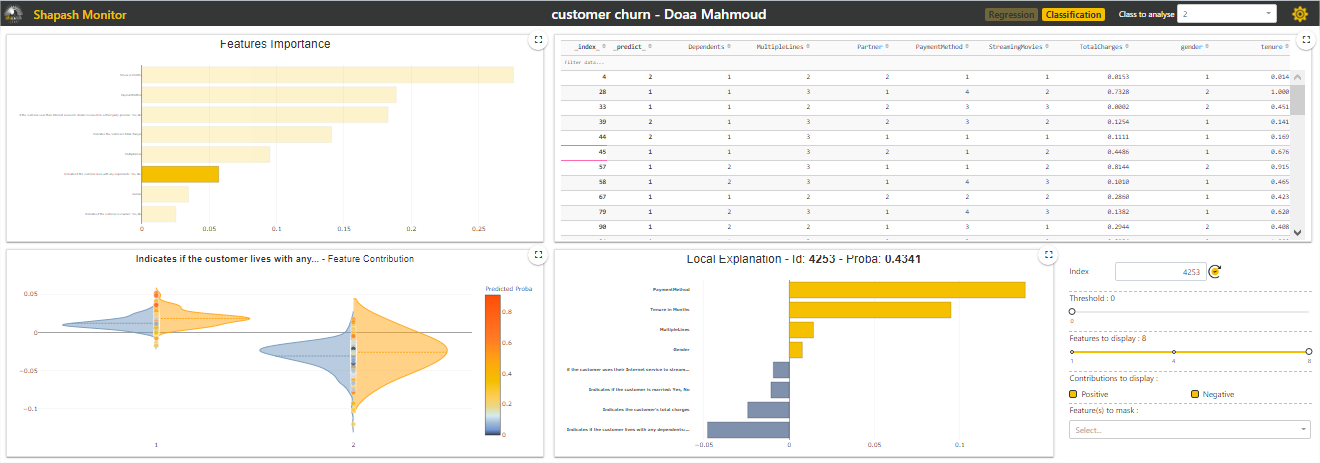

# Exploration and training of the model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
import seaborn as sns

In [2]:
df = pd.read_csv('Customer churn.csv',sep=',',encoding="utf-8")
df.head(20)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female            NaN     Yes         No     NaN           No   
1   5575-GNVDE    Male            NaN      No         No    34.0          Yes   
2   3668-QPYBK    Male            NaN      No         No     2.0          Yes   
3   7795-CFOCW    Male            NaN      No         No    45.0           No   
4   9237-HQITU  Female            NaN      No         No     2.0          Yes   
5   9305-CDSKC  Female            NaN      No         No     8.0          Yes   
6   1452-KIOVK    Male            NaN      No        Yes    22.0          Yes   
7   6713-OKOMC  Female            NaN      No         No    10.0           No   
8   7892-POOKP  Female            NaN     Yes         No    28.0          Yes   
9   6388-TABGU    Male            NaN      No        Yes    62.0          Yes   
10  9763-GRSKD    Male            NaN     Yes        Yes    13.0          Yes   
11  7469-LKBCI    Male            NaN      No         No    16.0          Yes   
12  8091-TTVAX    Male            NaN     Yes         No    58.0          Yes   
13  0280-XJGEX    Male            NaN      No         No    49.0          Yes   
14  5129-JLPIS    Male            NaN      No         No    25.0          Yes   
15  3655-SNQYZ  Female            NaN     Yes        Yes    69.0          Yes   
16  8191-XWSZG  Female            NaN      No         No    52.0          Yes   
17  9959-WOFKT    Male            NaN      No        Yes    71.0          Yes   
18  4190-MFLUW  Female            NaN     Yes        Yes    10.0          Yes   
19  4183-MYFRB  Female            NaN      No         No    21.0          Yes   

       MultipleLines InternetService       OnlineSecurity  ...  \
0   No phone service             DSL                   No  ...   
1                 No             DSL                  Yes  ...   
2                 No             DSL                  Yes  ...   
3   No phone service             DSL                  Yes  ...   
4                 No     Fiber optic                   No  ...   
5                Yes     Fiber optic                   No  ...   
6                Yes     Fiber optic                   No  ...   
7   No phone service             DSL                  Yes  ...   
8                Yes     Fiber optic                   No  ...   
9                 No             DSL                  Yes  ...   
10                No             DSL                  Yes  ...   
11                No              No  No internet service  ...   
12               Yes     Fiber optic                   No  ...   
13               Yes     Fiber optic                   No  ...   
14                No     Fiber optic                  Yes  ...   
15               Yes     Fiber optic                  Yes  ...   
16                No              No  No internet service  ...   
17               Yes     Fiber optic                  Yes  ...   
18                No             DSL                   No  ...   
19                No     Fiber optic                   No  ...   

       DeviceProtection          TechSupport          StreamingTV  \
0                    No                   No                   No   
1                   Yes                   No                   No   
2                    No                   No                   No   
3                   Yes                  Yes                   No   
4                    No                   No                   No   
5                   Yes                   No                  Yes   
6                    No                   No                  Yes   
7                    No                   No                   No   
8                   Yes                  Yes                  Yes   
9                    No                   No                   No   
10                   No                   No                   No   
11  No internet service  No internet service  No internet service   
12                

In [3]:
df.head(5) 



customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            NaN     Yes         No     NaN           No   
1  5575-GNVDE    Male            NaN      No         No    34.0          Yes   
2  3668-QPYBK    Male            NaN      No         No     2.0          Yes   
3  7795-CFOCW    Male            NaN      No         No    45.0           No   
4  9237-HQITU  Female            NaN      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7000 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6896 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


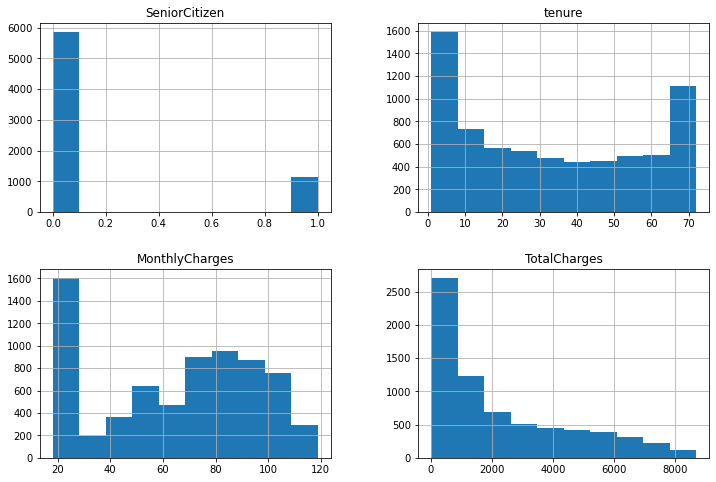

In [5]:
df.hist(figsize=(12,8))
plt.show()

 ### Missing Values

In [6]:
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen        43
Partner               0
Dependents            0
tenure              147
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

Text(0.5, 1.0, 'Missing Data')

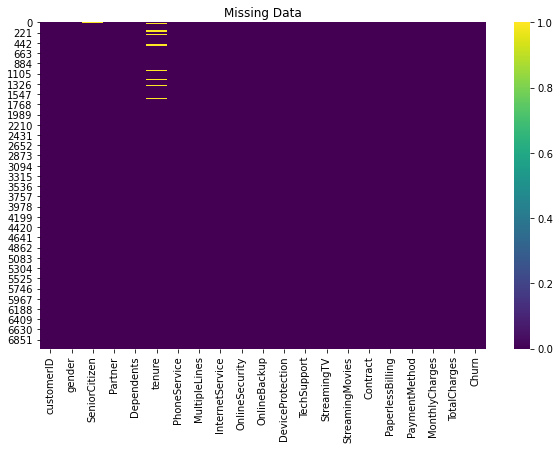

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Missing Data')

In [8]:
ten_mean = df['tenure'].mean()
df['tenure'].fillna(ten_mean)

0       33.041473
1       34.000000
2        2.000000
3       45.000000
4        2.000000
          ...    
7038    24.000000
7039    72.000000
7040    11.000000
7041     4.000000
7042    66.000000
Name: tenure, Length: 7043, dtype: float64

In [9]:
fill = {"tenure":df['tenure'].mean(),"SeniorCitizen":int(df['SeniorCitizen'].mode())}
df.fillna(fill,inplace=True)

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Preprocessing Step
Encoding Categorical Features

### Feature Selection

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
columns = ['gender','tenure','Partner','Dependents', 'MultipleLines','PaymentMethod','StreamingMovies','TotalCharges','Churn']
df = df[columns]
df.head()

gender     tenure Partner Dependents     MultipleLines  \
0  Female  33.041473     Yes         No  No phone service   
1    Male  34.000000      No         No                No   
2    Male   2.000000      No         No                No   
3    Male  45.000000      No         No  No phone service   
4  Female   2.000000      No         No                No   

               PaymentMethod StreamingMovies  TotalCharges Churn  
0           Electronic check              No         29.85    No  
1               Mailed check              No       1889.50    No  
2               Mailed check              No        108.15   Yes  
3  Bank transfer (automatic)              No       1840.75    No  
4           Electronic check              No        151.65   Yes

### Categorical Features
### Create Classification Model
In this section, I train a Machine Learning supervised model with customer churn data. In this example, we are confronted to a classification problem.

In [13]:
y=df['Churn'].to_frame()
X=df[df.columns.difference(['Churn'])]
df.head(3) 

gender     tenure Partner Dependents     MultipleLines     PaymentMethod  \
0  Female  33.041473     Yes         No  No phone service  Electronic check   
1    Male  34.000000      No         No                No      Mailed check   
2    Male   2.000000      No         No                No      Mailed check   

  StreamingMovies  TotalCharges Churn  
0              No         29.85    No  
1              No       1889.50    No  
2              No        108.15   Yes

In [14]:
from category_encoders import OrdinalEncoder

categorical_features = [col for col in X.columns if X[col].dtype == 'object']

encoder = OrdinalEncoder(
    cols=categorical_features,
    handle_unknown='ignore',
    return_df=True).fit(X)

X=encoder.transform(X)

C:\Users\Sniper\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [15]:
from category_encoders import OrdinalEncoder

categorical_features = [col for col in y.columns if y[col].dtype == 'object']

encoder = OrdinalEncoder(
    cols=categorical_features,
    handle_unknown='ignore',
    return_df=True).fit(y)

y=encoder.transform(y)

In [18]:
y.head()

Churn
0      1
1      1
2      2
3      1
4      2

In [19]:
X.head()

Dependents  MultipleLines  Partner  PaymentMethod  StreamingMovies  \
0           1              1        1              1                1   
1           1              2        2              2                1   
2           1              2        2              2                1   
3           1              1        2              3                1   
4           1              2        2              1                1   

   TotalCharges  gender     tenure  
0         29.85       1  33.041473  
1       1889.50       2  34.000000  
2        108.15       2   2.000000  
3       1840.75       2  45.000000  
4        151.65       1   2.000000

### Feature Scaling

In [21]:
ten_min = X['tenure'].min()
ten_max = X['tenure'].max()
X['tenure'] = (X['tenure']-ten_min)/(ten_max-ten_min)

In [22]:
tot_min = X['TotalCharges'].min()
tot_max = X['TotalCharges'].max()
X['TotalCharges'] = (X['TotalCharges']-tot_min)/(tot_max-tot_min)

In [24]:
X.head()

Dependents  MultipleLines  Partner  PaymentMethod  StreamingMovies  \
0           1              1        1              1                1   
1           1              2        2              2                1   
2           1              2        2              2                1   
3           1              1        2              3                1   
4           1              2        2              1                1   

   TotalCharges  gender    tenure  
0      0.001275       1  0.451288  
1      0.215867       2  0.464789  
2      0.010310       2  0.014085  
3      0.210241       2  0.619718  
4      0.015330       1  0.014085

# Train Test split + Random Forest fit


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier
import shap

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.75, random_state=1)

rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3)
rf.fit(Xtrain, ytrain)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(min_samples_leaf=3)

In [27]:
rf.score(Xtrain,ytrain)

0.867474441499432

In [28]:
rf.score(Xtest,ytest)

0.7864849517319704

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [33]:
ypred=pd.DataFrame(rf.predict(Xtest), columns=['pred'], index=Xtest.index)

In [34]:
confusion_matrix(ytest, ypred)

array([[1180,  147],
       [ 229,  205]], dtype=int64)

In [32]:
accuracy_score(ytest, ypred)

0.7864849517319704

In [35]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.84      0.89      0.86      1327
           2       0.58      0.47      0.52       434

    accuracy                           0.79      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.77      0.79      0.78      1761



In [36]:
data_dict = {'gender': 'Gender',
             'tenure': "Tenure in Months", 
             'Partner': 'Indicates if the customer is married: Yes, No',
             'Dependents': 'Indicates if the customer lives with any dependents: Yes, No.',
             'TotalCharges': "Indicates the customer’s total charges", 
             'StreamingMovies': 'if the customer uses their Internet service to stream movies from a third party provider: Yes, No',
             'Churn': 'Indicates if the customer  customer will remain in service or not'}

In [37]:
from shapash.explainer.smart_explainer import SmartExplainer

## Define a SmartExplainer

In [38]:
xpl = SmartExplainer(features_dict=data_dict) # optional parameter, specifies label for features name

# compile()
This method is the first step to understand model and prediction. It performs the sorting of contributions, the reverse preprocessing steps and all the calculations necessary for a quick display of plots and efficient summary of explanation. 


In [39]:
xpl.compile(
    x=Xtest,
    model=rf,
    y_pred=ypred,
)


Backend: Shap TreeExplainer


In [41]:
xpl.plot.features_importance()


In [43]:
xpl.plot.contribution_plot("StreamingMovies")


In [44]:
xpl.plot.contribution_plot("gender")

In [45]:
xpl.plot.contribution_plot("PaymentMethod")

In [46]:
xpl.plot.contribution_plot("MultipleLines")

In [47]:
xpl.plot.contribution_plot("tenure")

In [48]:
xpl.plot.contribution_plot("TotalCharges")

In [49]:
xpl.plot.contribution_plot("Dependents")

In [50]:
xpl.plot.compare_plot(index=[Xtest.index[0], Xtest.index[1]])


In [51]:
xpl.plot.compare_plot(row_num=[0, 1, 2, 3, 4], max_features=8)


In [52]:
xpl.plot.compare_plot(row_num=[0, 1,2 ,3], show_predict=False, max_features=100)

In [57]:
app = xpl.run_app(title_story='customer churn - Doaa Mahmoud')

C:\Users\Sniper\anaconda3\lib\site-packages\pandas\core\frame.py:1485: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

INFO:root:Your Shapash application run on http://DESKTOP-NTAD8BV:8050/
INFO:root:Use the method .kill() to down your app.


Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/



INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/



 * Serving Flask app "shapash.webapp.smart_app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://0.0.0.0:8050/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:49:28] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:49:30] "GET /_dash-dependencies HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:49:30] "GET /assets/favicon.ico?m=1617558242.282601 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:49:30] "GET /_dash-layout HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:49:31] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:49:31] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:49:31] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:49:31] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:49:31] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:49:31] "POST /_dash-update-componen

In [54]:
app.kill()


In [55]:

summary_df= xpl.to_pandas(
    max_contrib=9, # Number Max of features to show in summary
    threshold=500,
)

In [56]:
summary_df.head()

pred
3381     1
6180     1
4829     1
3737     1
4249     1

In [105]:
xpl.save('./xpl.pkl')

INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:25:01] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:25:02] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:25:03] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:25:03] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:25:03] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:25:04] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:25:06] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:25:07] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:25:09] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Apr/2021 00:25:09] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [0

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\Sniper\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Sniper\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Sniper\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\Sniper\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\Sniper\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Sniper\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\Sniper\anaconda3\lib\site-packages\dash\dash.py", line 1076, in dispatch
    respons

ERROR:shapash.webapp.smart_app:Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\Sniper\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Sniper\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Sniper\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\Sniper\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\Sniper\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Sniper\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\Sniper\anaconda3\lib\site-packages\dash\dash.py", lin

# Great Work !